# [E-01]RockPaperScissor

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, glob

In [9]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

800  images to be resized.
800  images resized.
가위 이미지 resize 완료!


In [13]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

800  images to be resized.
800  images resized.
바위 이미지 resize 완료!


In [12]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

800  images to be resized.
800  images resized.
보 이미지 resize 완료!


In [14]:

def load_data(img_path, number_of_data=2400):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2400 입니다.
x_train shape: (2400, 28, 28, 3)
y_train shape: (2400,)


라벨:  0


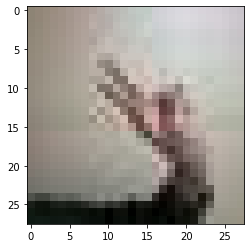

In [15]:
# 이미지 확인
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [57]:
# 딥러닝 네트워크 설계
n_channel_1=64
n_channel_2=32
n_dense=32
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
          
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_19 (Dense)             (None, 3)                

In [60]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/15
75/75 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9196
Epoch 2/15
75/75 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9575
Epoch 3/15
75/75 [==============================] - 0s 2ms/step - loss: 0.1670 - accuracy: 0.9404
Epoch 4/15
75/75 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.9725
Epoch 5/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0624 - accuracy: 0.9758
Epoch 6/15
75/75 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9804
Epoch 7/15
75/75 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9929
Epoch 8/15
75/75 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9958
Epoch 9/15
75/75 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9925
Epoch 10/15
75/75 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.9438
Epoch 11/15
75/75 [

In [26]:
# 테스트 이미지
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path, 300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


라벨:  0


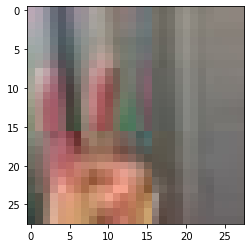

In [32]:
# 불러온 이미지 확인
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

In [63]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 3.0287 - accuracy: 0.6367
test_loss: 3.0287320613861084 
test_accuracy: 0.6366666555404663


# 회고

LMS에서 제공하는 데이터 300장으로 모델 테스트를 실행했을 땐 약 21%로 낮은 정확도가 나왔다.
내가 만든 데이터 600장(가위, 바위, 보 합친 장수)과 다른 사람들 데이터 1500장을 합쳐 총 2400장으로 실행하니 40%가 조금 넘는 정확도가 나왔다.
장수를 더 늘려볼까 생각했지만 조금 귀찮아져서 딥러닝 네트워크 설계의 채널 값과 덴스 값을 변경해 보기로 했다.
아직 저것들이 의미하는 것이 무엇인지 정확히 모르겠지만, 다른 값을 넣어보니 정확도가 달라지는 것을 확인할 수 있었다.
제일 먼저 입력한 값은 n_channel_1=16, n_channel_2=32, n_dense=64, n_train_epoch=15 이다.
그 다음으로 먼저 극단적으로 높게 바꿔보았다. n_channel_1=64, n_channel_2=128, n_dense=128, n_train_epoch=15
그래도 accuracy는 47%로 60%에 도달하지 못했다.
그 다음은 n_channel_1=16, n_channel_2=32, n_dense=32, n_train_epoch=20 으로 변경해보았다.
약47%로 60%에 도달하지 못했다.
그 다음은 n_channel_1=64, n_channel_2=32, n_dense=32, n_train_epoch=15 으로 변경해보았다.
63%로 드디어 60%가 넘었다.
그런데 학습이 랜덤인지 50%와 60%사이에서 왔다갔다 하는 거 같다.
제대로 하고 있는 게 맞는지 잘 모르겠다.
다음에는 데이터를 더 추가해서 만들어 봐야겠다.